# Importing data and checking the values overall

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

df=pd.read_csv('train.csv')

In [31]:

# Set display option to avoid scientific notation and limit decimals
pd.set_option('display.float_format', lambda x: '{:.1f}'.format(x) if x % 1 else '{:.0f}'.format(x))

def calculate_column_statistics_for_numeric_variables(df):
    # Filter columns with numeric (int or float) data types
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns

    # Get all column names
    all_columns = df.columns
    total_columns = len(all_columns)

    num_numeric_columns = len(numeric_columns)

    # Find columns with categorical values
    categorical_columns = [col for col in all_columns if df[col].dtype == 'object']

    print(f"Total number of columns: {total_columns}")
    print(f"Number of numeric columns (int or float): {num_numeric_columns}")

    # Create a dictionary to store statistics
    stats_dict = {
        'Variable': numeric_columns,
        'Mean': [],
        'Mode': [],
        'Median': [],
        'Standard Deviation': [],
        'Minimum': [],
        'Maximum': [],
        'Count': [],
        'IQR': [],
        'Skewness': [],
        'Range': []
    }

    for column in numeric_columns:
        mean = df[column].mean()
        mode = statistics.mode(df[column].dropna())  # Handle potential multiple modes
        median = df[column].median()
        std_dev = df[column].std()
        min_val = df[column].min()
        max_val = df[column].max()
        count = df[column].count()
        iqr = np.percentile(df[column].dropna(), 75) - np.percentile(df[column].dropna(), 25)
        skew = df[column].skew()
        column_range = max_val - min_val

        stats_dict['Mean'].append(mean)
        stats_dict['Mode'].append(mode)
        stats_dict['Median'].append(median)
        stats_dict['Standard Deviation'].append(std_dev)
        stats_dict['Minimum'].append(min_val)
        stats_dict['Maximum'].append(max_val)
        stats_dict['Count'].append(count)
        stats_dict['IQR'].append(iqr)
        stats_dict['Skewness'].append(skew)
        stats_dict['Range'].append(column_range)

    # Create a DataFrame from the dictionary
    stats_df = pd.DataFrame(stats_dict)

    return stats_df


calculate_column_statistics_for_numeric_variables(df)

Total number of columns: 70
Number of numeric columns (int or float): 56


,Variable,Mean,Mode,Median,Standard Deviation,Minimum,Maximum,Count,IQR,Skewness,Range
0,id,223463.6,216302,227951,26877.0,41,264481,6895,34821,-1.5,264440
1,overall,68.8,67,68,6.0,49,93,6895,7,0.4,44
2,potential,72.0,72,72,6.1,53,95,6895,8,0.3,42
3,value_eur,4320388.1,1200000,1400000,10525544.5,25000,194000000,6893,2175000,6.5,193975000
4,wage_eur,12034.1,2000,4000,24630.8,500,350000,6895,10000,5.9,349500
5,height_cm,181.5,180,182,6.9,156,203,6895,9,-0.1,47
6,weight_kg,75.5,70,75,7.0,53,103,6895,10,0.2,50
7,league_level,1.4,1,1,0.8,1,5,6895,0,2.2,4
8,club_jersey_number,16.4,10,13,15.4,1,99,6895,16,2.6,98
9,club_contract_valid_until,2022.8,2022,2023,1.2,2021,2028,6895,2,0.7,7


In [32]:
#I want to create a function that creates a dataframe that gives me the categorical variables, the number of unique values, and the top 5 most frequent values. I want to be able to use this function on any dataframe that I have. I have tried the following code but it does not work. I am not sure how to fix it. I am new to python and pandas so any help would be appreciated. Thank you!

def calculate_column_statistics_for_categorical_variables(df):
    # Filter columns with categorical data types
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Get all column names
    all_columns = df.columns
    total_columns = len(all_columns)

    num_categorical_columns = len(categorical_columns)

    # Find columns with numeric values
    numeric_columns = [col for col in all_columns if df[col].dtype == 'int' or df[col].dtype == 'float']

    print(f"Total number of columns: {total_columns}")
    print(f"Number of categorical columns: {num_categorical_columns}")

    # Set the max_colwidth option to control the width of the displayed column
    pd.set_option('max_colwidth', 100)  # Adjust the width as needed

    # Create a dictionary to store statistics
    stats_dict = {
        'Variable': categorical_columns,
        'Number of Unique Values': [],
        'Top 5 Most Frequent Values': []
    }

    for column in categorical_columns:
        num_unique_values = df[column].nunique()
        top_5_frequent_values = df[column].value_counts().index[:5].tolist()  # Get the top 5 values as a list

        stats_dict['Number of Unique Values'].append(num_unique_values)
        stats_dict['Top 5 Most Frequent Values'].append(top_5_frequent_values)

    # Create a DataFrame from the dictionary
    stats_df = pd.DataFrame(stats_dict)

    # Sort the DataFrame downward by the number of unique values
    stats_df = stats_df.sort_values(by='Number of Unique Values', ascending=False)
    stats_df = stats_df.reset_index(drop=True)

    return stats_df

calculate_column_statistics_for_categorical_variables(df)

Total number of columns: 70
Number of categorical columns: 14


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,short_name,6692,"[J. Rodríguez, J. Brown, L. Rodríguez, Danilo, Paulinho]"
1,birthday_date,3991,"[1992-02-29, 1996-02-29, 2000-02-29, 1988-02-29, 1992-01-05]"
2,club_joined,1263,"[2021-07-01, 2019-07-01, 2018-07-01, 2017-07-01, 2020-07-01]"
3,player_traits,772,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Passer (AI), Long Shot Taker (..."
4,club_name,701,"[Strømsgodset IF, Chongqing Liangjiang Athletic, Club Athletico Paranaense, Club de Deportes Cob..."
5,club_loaned_from,196,"[Racing Club, Chelsea, Manchester United, Liverpool, Wolverhampton Wanderers]"
6,nationality_name,144,"[England, Germany, Brazil, Argentina, Spain]"
7,player_tags,61,"[#Strength, #Engine, #Acrobat, #Speedster, #Speedster, #Acrobat]"
8,league_name,55,"[USA Major League Soccer, Argentina Primera División, English League One, English League Champio..."
9,position,24,"[RCB, GK, LCB, RB, LB]"


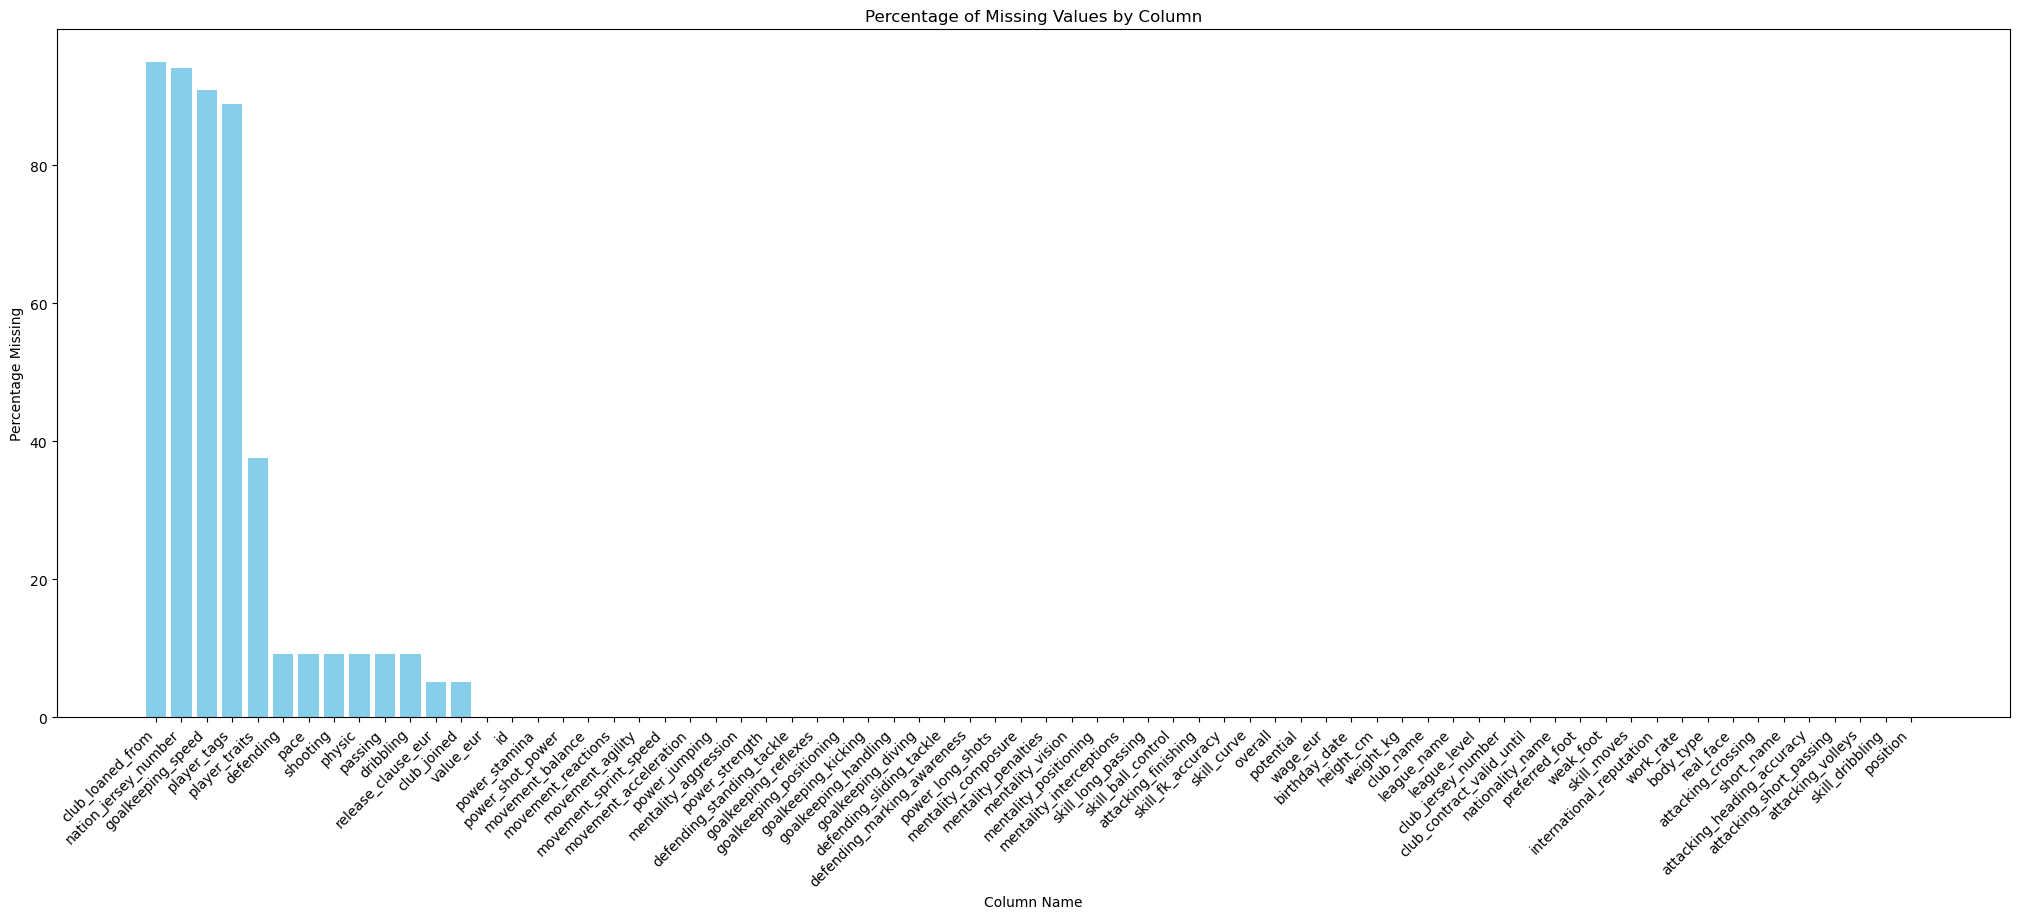


Columns with Missing Values (Descending Order):
club_loaned_from: 94.91% (Categorical)
nation_jersey_number: 94.01% (Numerical)
goalkeeping_speed: 90.85% (Numerical)
player_tags: 88.82% (Categorical)
player_traits: 37.55% (Categorical)
defending: 9.15% (Numerical)
pace: 9.15% (Numerical)
shooting: 9.15% (Numerical)
physic: 9.15% (Numerical)
passing: 9.15% (Numerical)
dribbling: 9.15% (Numerical)
release_clause_eur: 5.12% (Numerical)
club_joined: 5.09% (Categorical)
value_eur: 0.03% (Numerical)


In [33]:
def calculate_missing_info_print_only(df):
    # Calculate the percentage of missing values in each column
    missing_percentages_df = (df.isnull().mean() * 100).round(2).reset_index()
    missing_percentages_df.columns = ['Column Name', 'Percentage Missing']

    # Sort the DataFrame by 'Percentage Missing' in descending order
    missing_percentages_df = missing_percentages_df.sort_values(by='Percentage Missing', ascending=False)

    # Classify columns as numerical or categorical
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    missing_percentages_df['Column Type'] = missing_percentages_df['Column Name'].apply(
        lambda x: 'Numerical' if x in numerical_columns else 'Categorical'
    )

    # Display a bar chart of missing values with increased space between bars
    plt.figure(figsize=(20, 9))
    plt.bar(missing_percentages_df['Column Name'], missing_percentages_df['Percentage Missing'], color='skyblue')
    plt.xlabel('Column Name')
    plt.ylabel('Percentage Missing')
    plt.title('Percentage of Missing Values by Column')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout(pad=0.0001)  # Adjust the padding between bars
    plt.show()

    # Print column names, missing percentages, and column types for columns with missing values higher than 0%
    print("\nColumns with Missing Values (Descending Order):")
    for index, row in missing_percentages_df.iterrows():
        if row['Percentage Missing'] > 0:
            print(f"{row['Column Name']}: {row['Percentage Missing']}% ({row['Column Type']})")

# Example usage with the existing DataFrame 'df'
calculate_missing_info_print_only(df)



Dealing with missing values.

Taking a looking at missing values, club_loaned_from, nation_jersey_number, club_joined are not relevant in terms of positioning. 

Observing the numerical values, goalkeeping_spped, defending, pace, shooting, passing, dribling, physic, it does not also make sense to fill them in any way, as they are caractheristics from the players themselves and there is a nice relation between them.

If you look at goalkepping_speed, you see that it is 90.85%. The other missing values are 9.15%, meaning that probably we have here a relation that the goalkeeping_speed misses in players which are not goalkeeps and the other ones miss in the ones that are goalkeepers.

Player_tags and player_traits might be useful. And we need to think about how to treat it.

Release Clause and value err may be collinear as they indicate pretty much the same information. Although value_eur is a variable that probably needs treatment.



# Dealing with missing values

Let's take a look first on goal_keeping speed to understand what is going on there.

We need to check two things: players with GoalKeeping speed are Goalkeepers and if there any goalkeepers without goalkeeping speed.

Our results says that the previous hyphothesis is confirmed. As a result, and to make it possible to go the model, I will fill with 0 the missing values.

In [34]:
# Filter the DataFrame for players with non-null 'goalkeeping_speed' values
players_with_gk_speed = df[df['goalkeeping_speed'].notnull()]

# Extracting the positions of these players
positions_of_players_with_gk_speed = players_with_gk_speed['position'].unique()

print(positions_of_players_with_gk_speed)

# Check for goalkeepers without 'goalkeeping_speed' values
gk_without_gk_speed = df[(df['position'] == 'GK') & (df['goalkeeping_speed'].isnull())]

gk_without_gk_speed_count = gk_without_gk_speed.shape[0]
print(gk_without_gk_speed_count)



['GK']
0


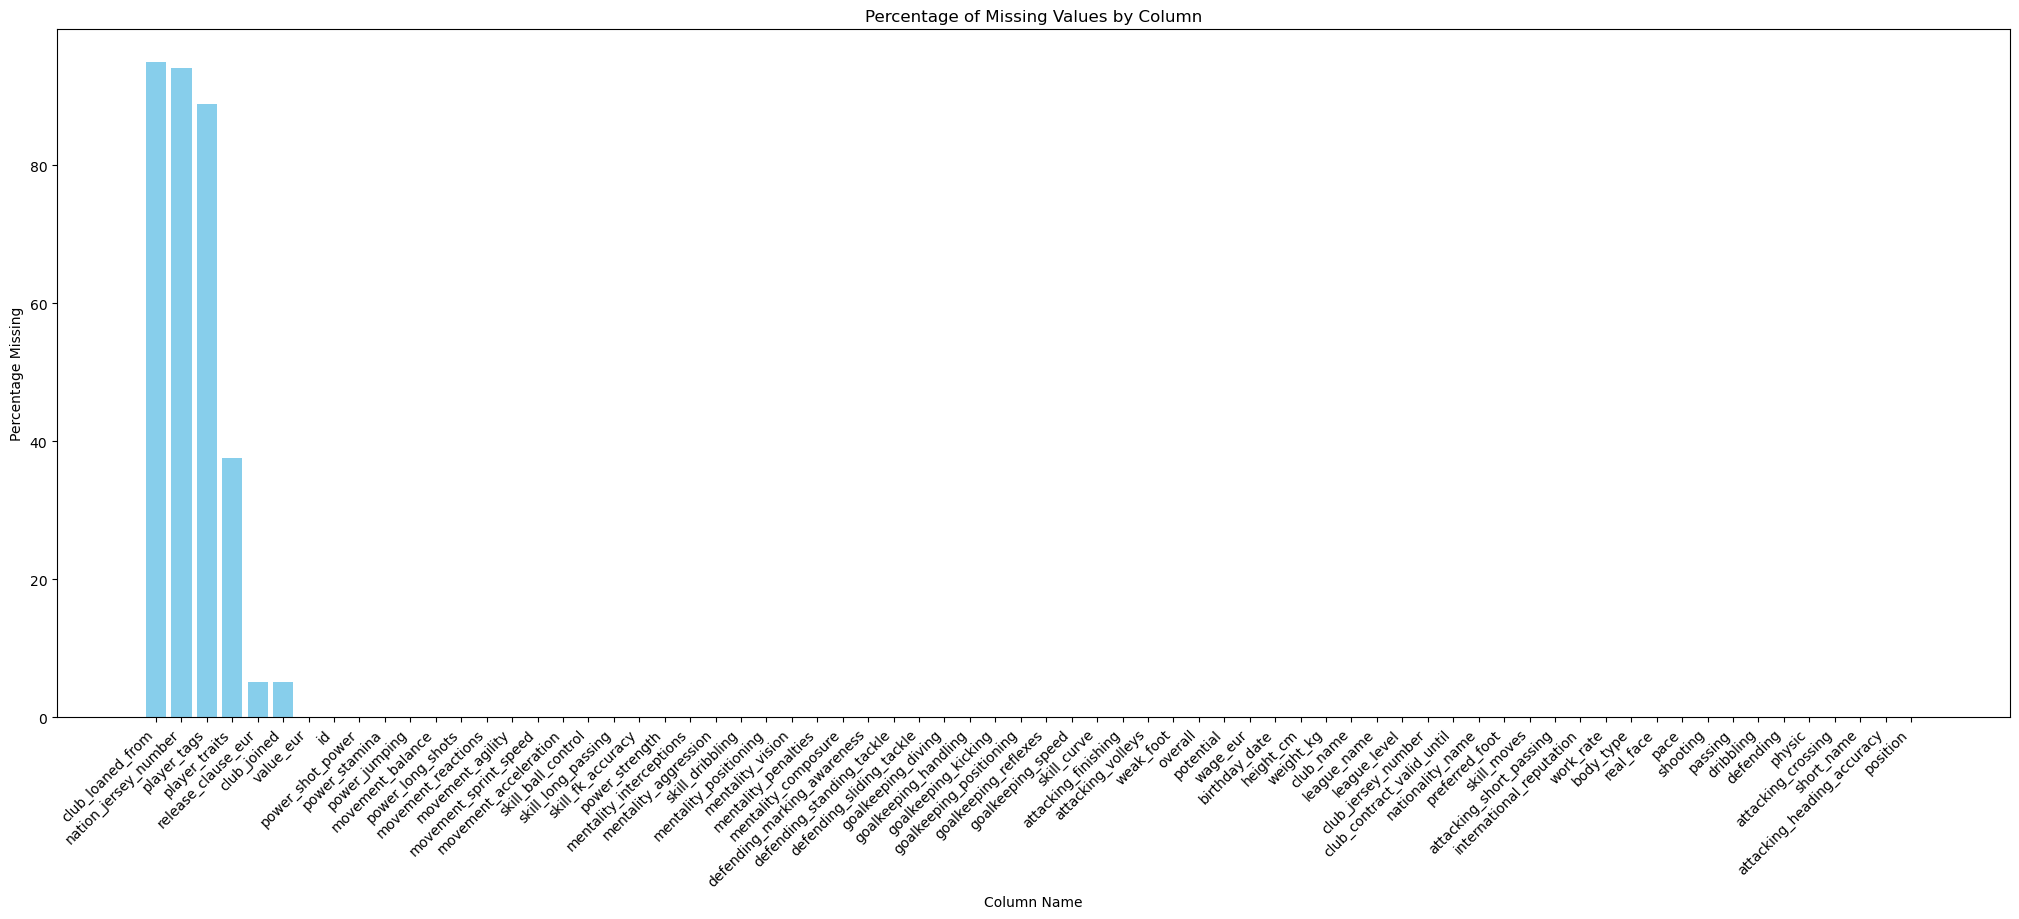


Columns with Missing Values (Descending Order):
club_loaned_from: 94.91% (Categorical)
nation_jersey_number: 94.01% (Numerical)
player_tags: 88.82% (Categorical)
player_traits: 37.55% (Categorical)
release_clause_eur: 5.12% (Numerical)
club_joined: 5.09% (Categorical)
value_eur: 0.03% (Numerical)


In [35]:
def fill_selected_columns_hardcoded(df):
    df_modified = df.copy()

    # List of columns to fill with 0
    columns_to_fill = ['goalkeeping_speed', 'defending', 'pace', 'shooting', 'physic', 'passing', 'dribbling']

    # Filling missing values in the specified columns with 0
    for column in columns_to_fill:
        if column in df_modified.columns:
            df_modified[column] = df_modified[column].fillna(0)

    return df_modified

df=fill_selected_columns_hardcoded(df)

"""Note, can we make sure that GK are directly attributed if goalkeeping_speed is 0?"""

calculate_missing_info_print_only(df)


Now I wil drop club_loaned_from, nation_jersey_number and club_joined

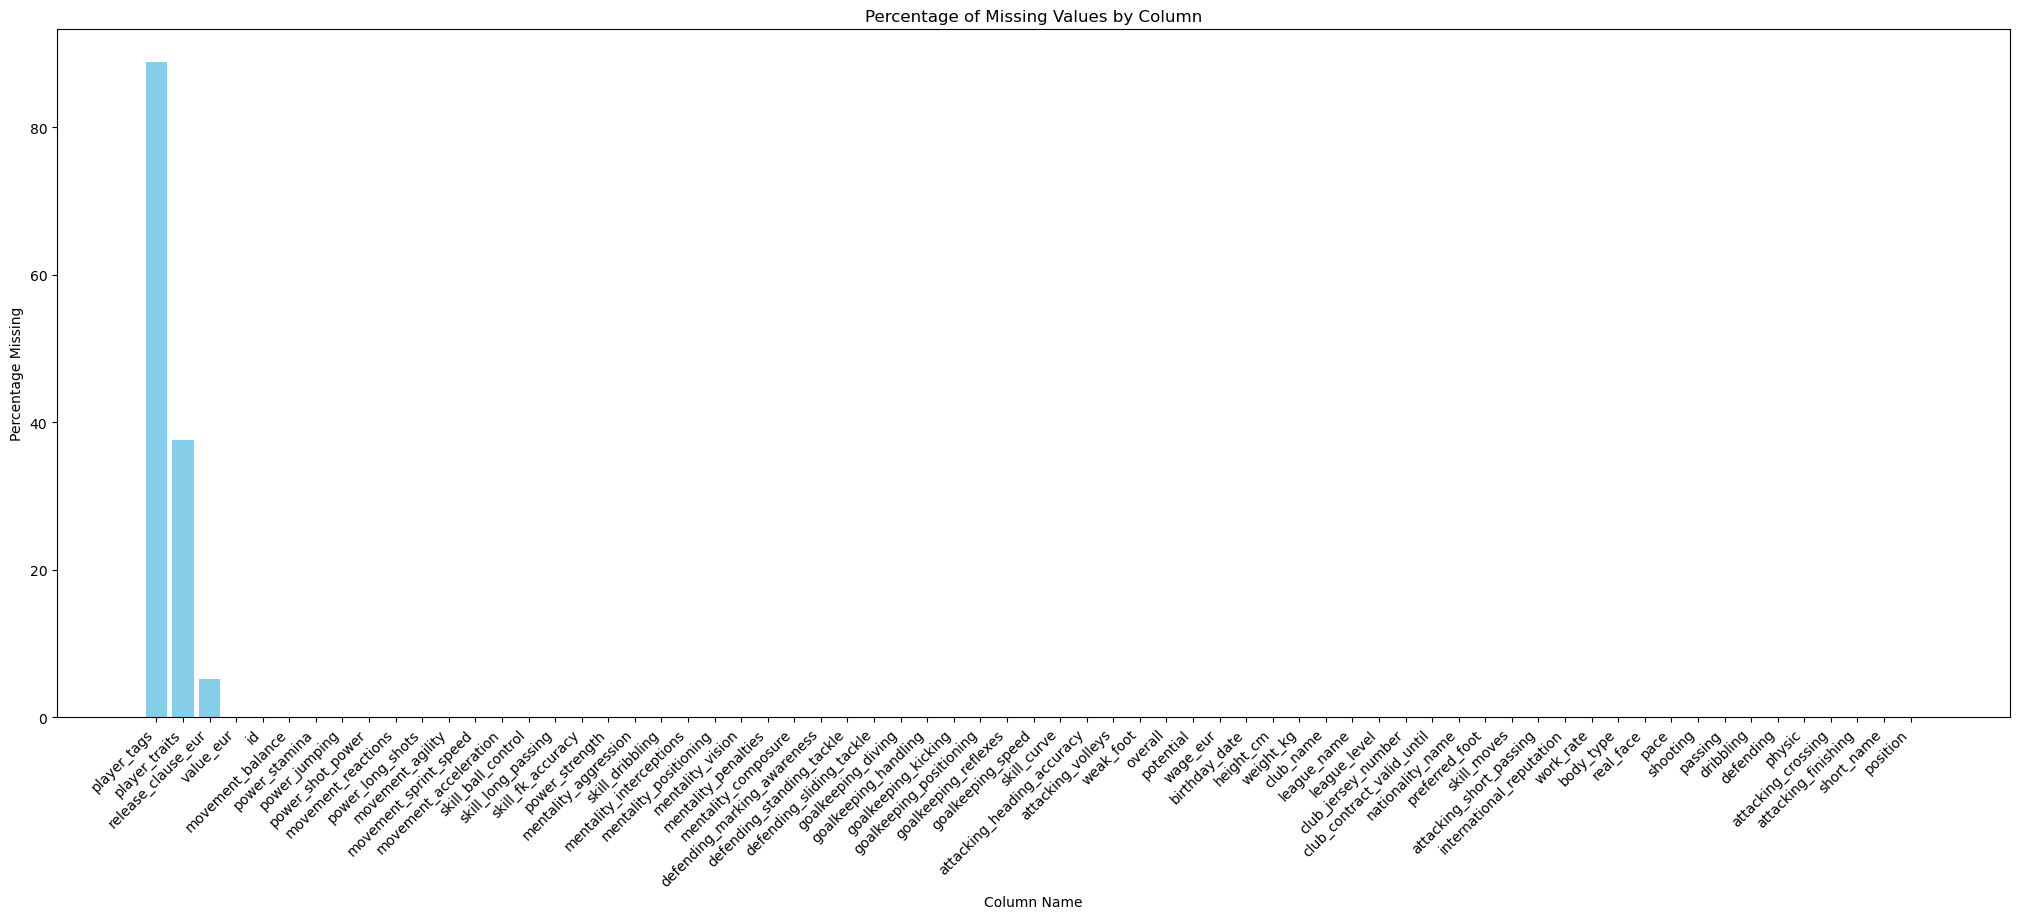


Columns with Missing Values (Descending Order):
player_tags: 88.82% (Categorical)
player_traits: 37.55% (Categorical)
release_clause_eur: 5.12% (Numerical)
value_eur: 0.03% (Numerical)


In [36]:
def drop_columns(df):
    return df.drop(['club_loaned_from', 'nation_jersey_number', 'club_joined'], axis=1)

df=drop_columns(df)

calculate_missing_info_print_only(df)


Taking care of value_eur and release_clause_eur.

Release_clause_eur is correlated almost as 1 with value_eur. 
We just have two observations without value and they dont have release_clause_eur.

For the moment, I will just drop them.



In [37]:
corr_release_value = df[['release_clause_eur', 'value_eur']].corr()
corr_release_value

,release_clause_eur,value_eur
release_clause_eur,1,1.0
value_eur,1.0,1


For the moment, I will put the KNN the value_eur and drop release_clause_eur.

In [41]:
def fill_value_eur_with_knn_and_print_details_v2(df, target_column='value_eur', n_neighbors=5):
    categorical_columns = ['club_name', 'league_name', 'preferred_foot']

    # Selecting numeric columns for KNN imputation
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    df_numeric = df[numeric_columns]

    # Creating a temporary DataFrame with encoded categorical variables
    df_temp = df.copy()
    for col in categorical_columns:
        if col in df_temp.columns:
            encoder = OrdinalEncoder()
            df_temp[col] = encoder.fit_transform(df_temp[[col]])

    # Merging numeric and encoded categorical data for imputation
    df_temp = pd.concat([df_numeric, df_temp[categorical_columns]], axis=1)

    # KNN imputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = imputer.fit_transform(df_temp)
    df_imputed = pd.DataFrame(df_imputed, columns=df_temp.columns)

    # Identify the indices where 'value_eur' was originally missing
    missing_value_indices = df[df[target_column].isnull()].index

    # Update the target column in the original DataFrame with imputed values
    df[target_column] = df_imputed[target_column]

    # Print the detailed imputed values and the club's median values
    for index in missing_value_indices:
        player_name = df.at[index, 'short_name']
        club_name = df.at[index, 'club_name']
        imputed_value = df_imputed.at[index, target_column]
        club_median_value = df.groupby('club_name')[target_column].median().loc[club_name]
        print(f"{player_name} has been filled with {imputed_value}. He plays for {club_name}, where the median wage is {club_median_value}.")

    return df

# Applying the function to the DataFrame
df_filled_with_details_v2 = fill_value_eur_with_knn_and_print_details_v2(df)


İ. Öztürk has been filled with 1350000.0. He plays for Altay SK, where the median wage is 1500000.0.
J. Sand has been filled with 1325000.0. He plays for Club Atlético Lanús, where the median wage is 2100000.0.


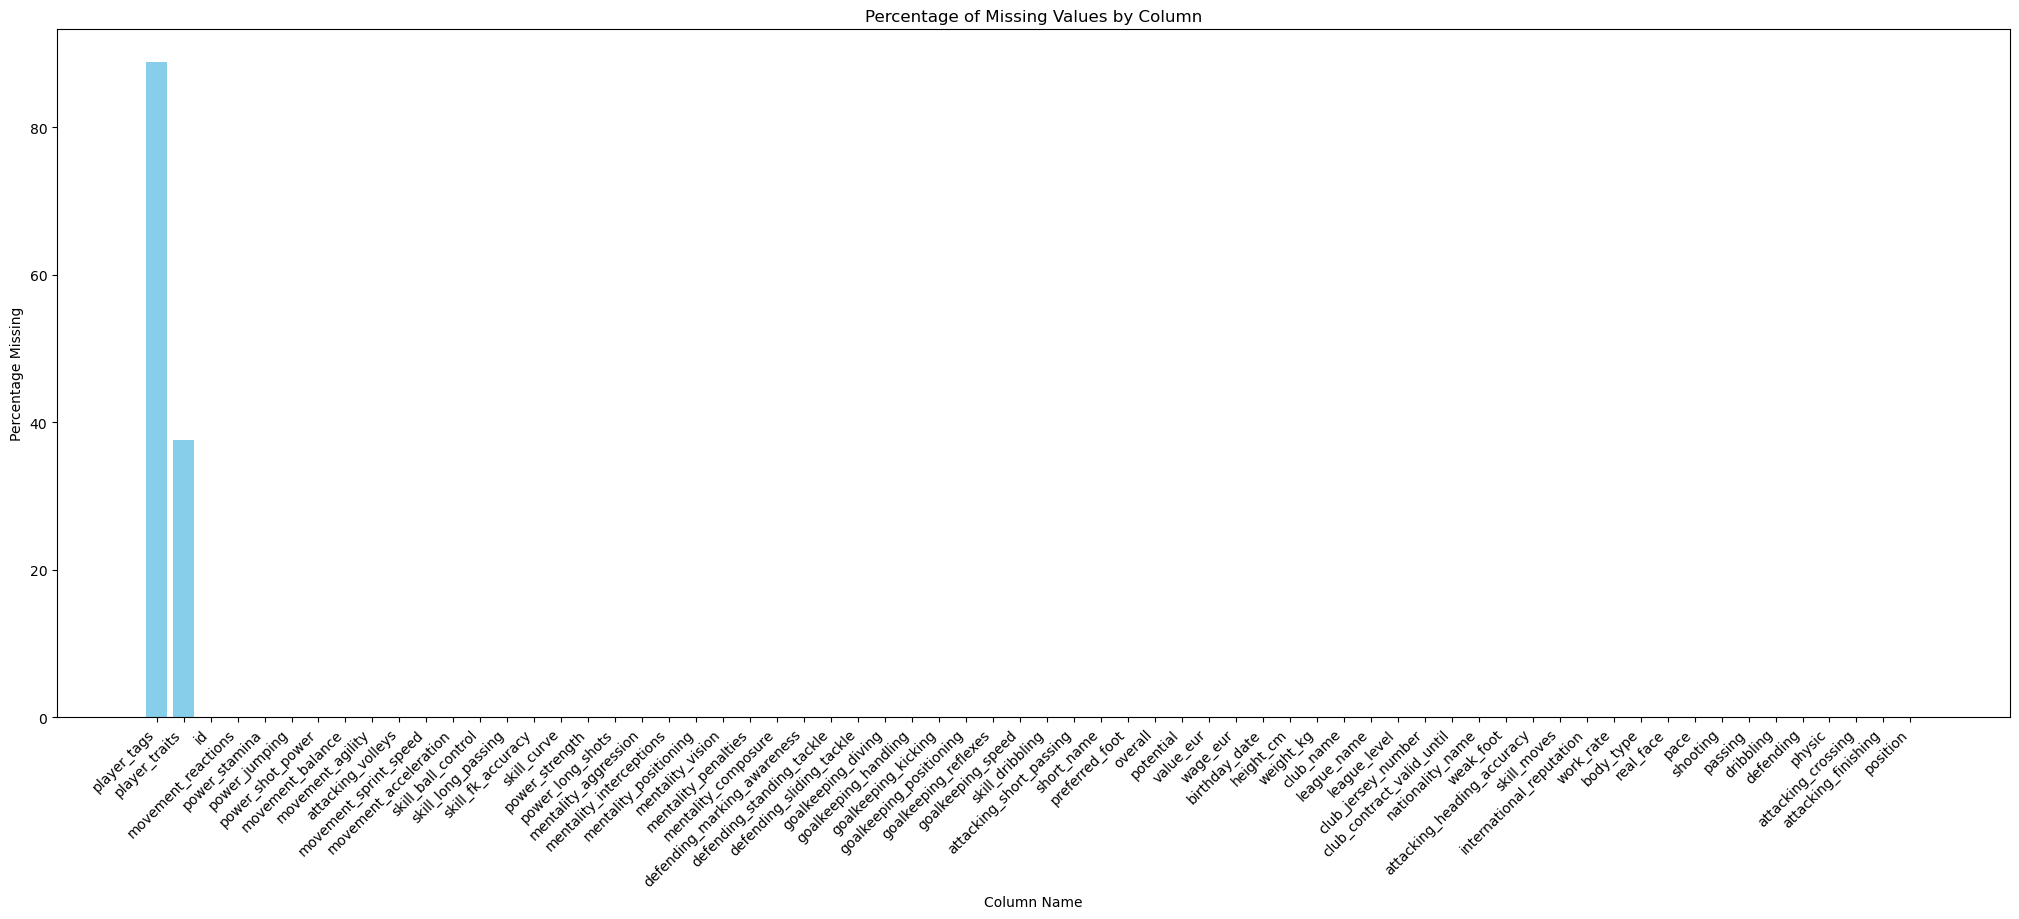


Columns with Missing Values (Descending Order):
player_tags: 88.82% (Categorical)
player_traits: 37.55% (Categorical)


In [42]:
def drop_column_release_clause(df):
    return df.drop(['release_clause_eur'], axis=1)

df=drop_column_release_clause(df)

calculate_missing_info_print_only(df)


I will deal with these later.

# Taking care of categorical variables

In [43]:
calculate_column_statistics_for_categorical_variables(df)

Total number of columns: 66
Number of categorical columns: 12


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,short_name,6692,"[J. Rodríguez, J. Brown, L. Rodríguez, Danilo, Paulinho]"
1,birthday_date,3991,"[1992-02-29, 1996-02-29, 2000-02-29, 1988-02-29, 1992-01-05]"
2,player_traits,772,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Passer (AI), Long Shot Taker (..."
3,club_name,701,"[Strømsgodset IF, Chongqing Liangjiang Athletic, Club Athletico Paranaense, Club de Deportes Cob..."
4,nationality_name,144,"[England, Germany, Brazil, Argentina, Spain]"
5,player_tags,61,"[#Strength, #Engine, #Acrobat, #Speedster, #Speedster, #Acrobat]"
6,league_name,55,"[USA Major League Soccer, Argentina Primera División, English League One, English League Champio..."
7,position,24,"[RCB, GK, LCB, RB, LB]"
8,body_type,10,"[Normal (170-185), Normal (185+), Lean (170-185), Lean (185+), Normal (170-)]"
9,work_rate,9,"[Medium/Medium, High/Medium, Medium/High, High/High, High/Low]"


I will take care first of the binary variables

In [44]:
def encode_binary_categorical_and_drop_originals(df):
    if 'preferred_foot' in df.columns:
        df['preferred_foot_encoded'] = df['preferred_foot'].map({'Left': 0, 'Right': 1})
        print("preferred_foot: 'Left' is encoded as 0, 'Right' is encoded as 1")
        df.drop('preferred_foot', axis=1, inplace=True)
    
    if 'real_face' in df.columns:
        df['real_face_encoded'] = df['real_face'].map({'No': 0, 'Yes': 1})
        print("real_face: 'No' is encoded as 0, 'Yes' is encoded as 1")
        df.drop('real_face', axis=1, inplace=True)

    return df
df=encode_binary_categorical_and_drop_originals(df)

preferred_foot: 'Left' is encoded as 0, 'Right' is encoded as 1
real_face: 'No' is encoded as 0, 'Yes' is encoded as 1


Now, I am going to encode, club_name, nationality name, league name.

In [45]:
def encode_high_cardinality_variables_and_drop_originals(df):
    encoder = OrdinalEncoder()
    for col in ['club_name', 'nationality_name', 'league_name']:
        if col in df.columns:
            df[col + '_encoded'] = encoder.fit_transform(df[[col]])
            df.drop(col, axis=1, inplace=True)  # Dropping the original column

    return df

# Applying the function to the DataFrame
df= encode_high_cardinality_variables_and_drop_originals(df)

In [46]:
def encode_additional_categorical_variables_and_drop_originals(df):
    encoder = OrdinalEncoder()
    for col in ['body_type', 'work_rate']:
        if col in df.columns:
            df[col + '_encoded'] = encoder.fit_transform(df[[col]])
            df.drop(col, axis=1, inplace=True)  # Dropping the original column

    return df

df=encode_additional_categorical_variables_and_drop_originals(df)

In [47]:
calculate_column_statistics_for_categorical_variables(df)

Total number of columns: 66
Number of categorical columns: 5


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,short_name,6692,"[J. Rodríguez, J. Brown, L. Rodríguez, Danilo, Paulinho]"
1,birthday_date,3991,"[1992-02-29, 1996-02-29, 2000-02-29, 1988-02-29, 1992-01-05]"
2,player_traits,772,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Passer (AI), Long Shot Taker (..."
3,player_tags,61,"[#Strength, #Engine, #Acrobat, #Speedster, #Speedster, #Acrobat]"
4,position,24,"[RCB, GK, LCB, RB, LB]"


Done, lets go to test

# Final Check up before testing

In [48]:
calculate_column_statistics_for_categorical_variables(df)

Total number of columns: 66
Number of categorical columns: 5


,Variable,Number of Unique Values,Top 5 Most Frequent Values
0,short_name,6692,"[J. Rodríguez, J. Brown, L. Rodríguez, Danilo, Paulinho]"
1,birthday_date,3991,"[1992-02-29, 1996-02-29, 2000-02-29, 1988-02-29, 1992-01-05]"
2,player_traits,772,"[Speed Dribbler (AI), Power Header, Dives Into Tackles (AI), Long Passer (AI), Long Shot Taker (..."
3,player_tags,61,"[#Strength, #Engine, #Acrobat, #Speedster, #Speedster, #Acrobat]"
4,position,24,"[RCB, GK, LCB, RB, LB]"


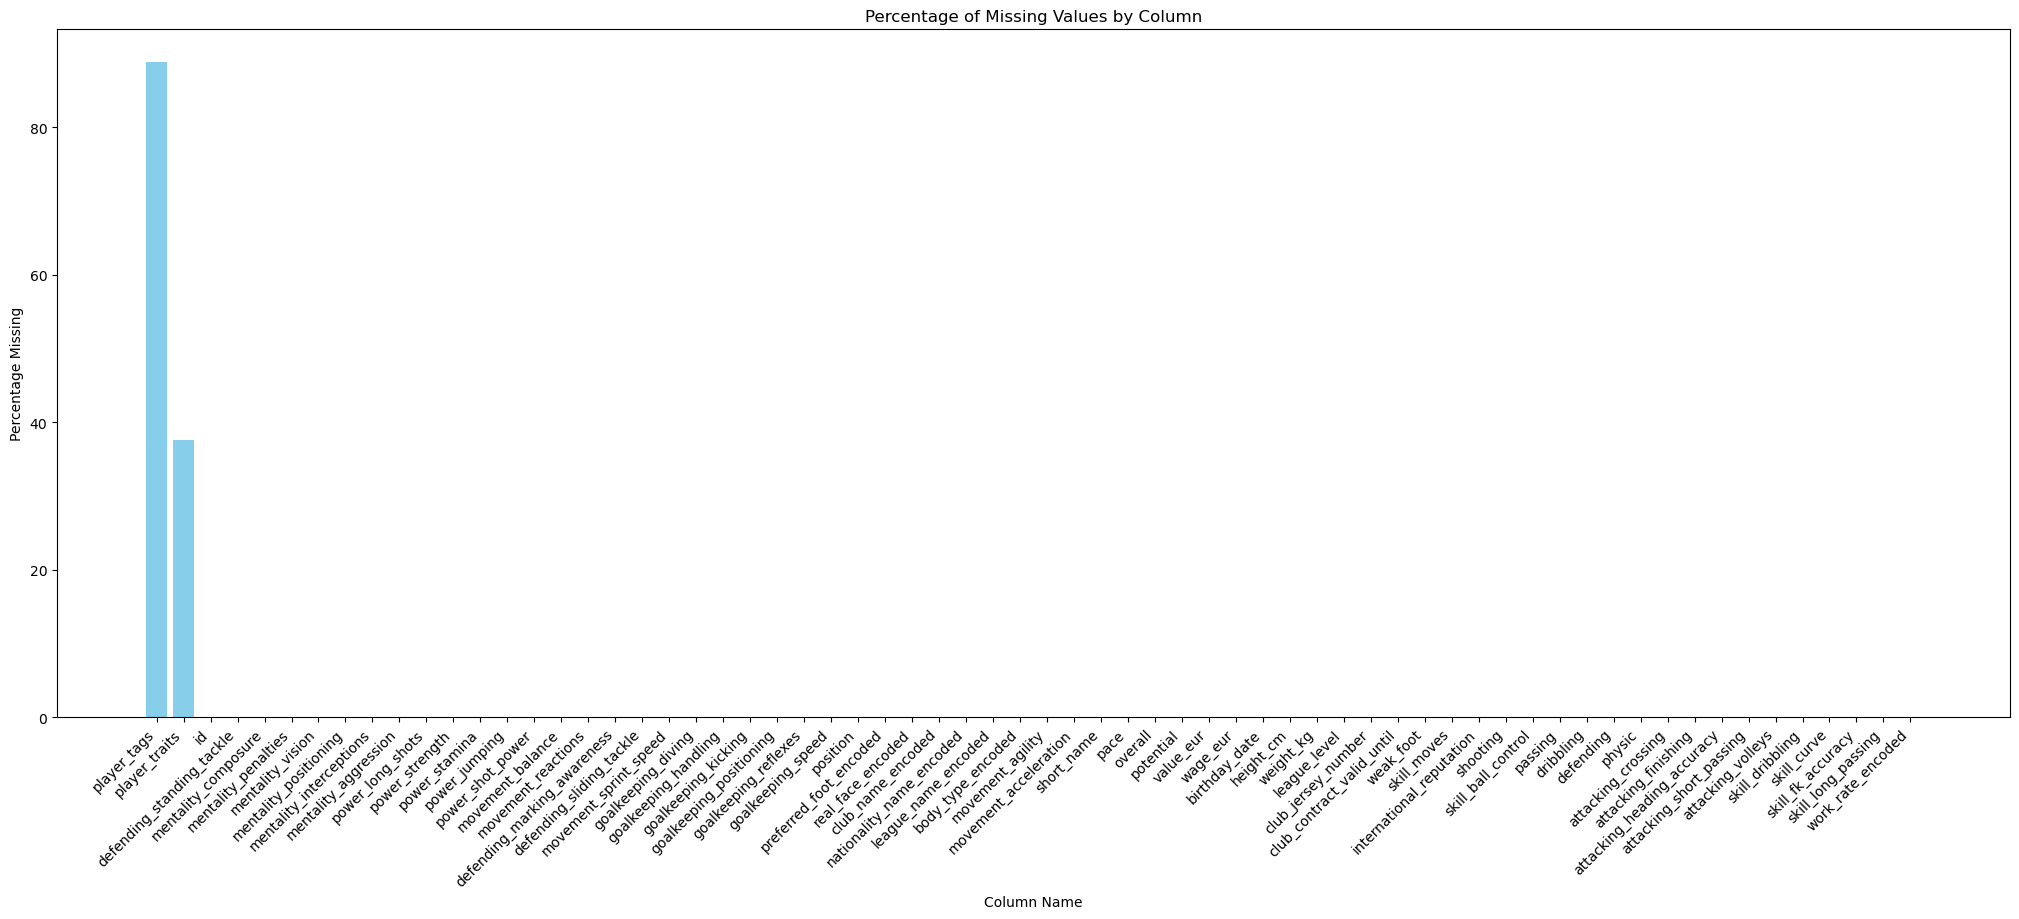


Columns with Missing Values (Descending Order):
player_tags: 88.82% (Categorical)
player_traits: 37.55% (Categorical)


In [49]:
calculate_missing_info_print_only(df)


# Tests


Let's now mix concatenate sets, do the same transformations, separate them and run the tests.


In [67]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df=pd.concat([df, df_test], ignore_index=True)

df.head(20)

,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
0,216302,E. García,71,71,1400000,10000,1989-12-28,176,73,Club Atlético de San Luis,...,65,66,65,14,11,12,12,12,NaN,LB
1,237867,D. Cancola,65,71,1000000,2000,1996-10-23,183,73,Ross County FC,...,65,61,58,10,13,7,6,11,NaN,LDM
2,253472,E. Kahl,65,77,1600000,2000,2001-09-27,178,69,Aarhus GF,...,60,58,59,10,10,8,10,11,NaN,LWB
3,223994,S. Mugoša,72,72,2300000,5000,1992-02-26,188,81,Incheon United FC,...,16,22,19,16,15,13,8,9,NaN,LS
4,251635,A. Țigănașu,65,65,525000,3000,1990-06-12,179,74,FC Botoşani,...,64,61,58,12,5,11,12,15,NaN,LB
5,219575,C. Bordacahar,68,68,1200000,500,1991-10-27,183,70,FBC Melgar,...,23,27,22,14,12,15,9,15,NaN,RW
6,200316,T. Horn,76,78,6500000,21000,1993-05-12,192,90,1. FC Köln,...,14,13,12,77,77,60,70,78,47,GK
7,222199,Zheng Kaimu,59,59,220000,2000,1992-01-28,186,80,Shijiazhuang Ever Bright F.C.,...,57,60,60,14,8,15,15,15,NaN,LCM
8,234172,B. Bese,69,69,1300000,7000,1994-05-06,188,84,Oud-Heverlee Leuven,...,60,66,61,11,7,9,14,15,NaN,RM
9,233196,Li Hang,63,63,400000,3000,1989-09-19,182,77,Wuhan FC,...,58,57,55,7,11,15,7,8,NaN,RCM


In [68]:
df=fill_selected_columns_hardcoded(df)
df=drop_columns(df)
df= fill_value_eur_with_knn_and_print_details_v2(df)
df=drop_column_release_clause(df)
df=encode_binary_categorical_and_drop_originals(df)
df= encode_high_cardinality_variables_and_drop_originals(df)
df=encode_additional_categorical_variables_and_drop_originals(df)




İ. Öztürk has been filled with 286000.0. He plays for Altay SK, where the median wage is 1300000.0.
J. Sand has been filled with 1325000.0. He plays for Club Atlético Lanús, where the median wage is 2100000.0.
Rubén Castro has been filled with 184000.0. He plays for FC Cartagena, where the median wage is 1100000.0.
Zheng Zhi has been filled with 675000.0. He plays for Guangzhou FC, where the median wage is 1300000.0.
P. Da Silva has been filled with 353000.0. He plays for 12 de Octubre FC, where the median wage is 625000.0.
preferred_foot: 'Left' is encoded as 0, 'Right' is encoded as 1
real_face: 'No' is encoded as 0, 'Yes' is encoded as 1


In [69]:
def list_numerical_columns_horizontally_with_quotes(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numerical_columns_with_quotes = ', '.join([f'"{col}"' for col in numerical_columns])
    return numerical_columns_with_quotes

list_numerical_columns_horizontally_with_quotes(df)

'"id", "overall", "potential", "value_eur", "wage_eur", "height_cm", "weight_kg", "league_level", "club_jersey_number", "club_contract_valid_until", "weak_foot", "skill_moves", "international_reputation", "pace", "shooting", "passing", "dribbling", "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "go

In [70]:
"""From the numerical I will drop id, club_jersey_number and club_contract_valid_until"""

def drop_specified_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

# Defining the columns to drop
columns_to_drop = ['club_jersey_number', 'club_contract_valid_until']

df=drop_specified_columns(df, columns_to_drop)


In [71]:
test_dataset = df[df['position'].isna()]
train_dataset = df[df['position'].notna()]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


In [74]:
def train_and_apply_model(df_train, df_test):
    # Hard-coded feature columns
    feature_columns = ["overall", "value_eur", "height_cm", "weight_kg", "shooting", "passing", "dribbling", "defending", "attacking_crossing", "attacking_finishing", "skill_dribbling","skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_marking_awareness", "goalkeeping_speed"]

    # Selecting the features for training
    X_train = df_train[feature_columns]
    y_train = df_train['position']

    # Training the Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Selecting the features for testing
    X_test = df_test[feature_columns]

    # Making predictions for test_dataset
    y_test_predicted = model.predict(X_test)

    # Filling in the missing 'position' values in test_dataset
    df_test['position'] = y_test_predicted

    return df_test

# Load your train_dataset and test_dataset here

# Calling the function to train and apply the model
predicted_test_dataset = train_and_apply_model(train_dataset, test_dataset)






/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_8597/2489646698.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['position'] = y_test_predicted


In [76]:
# Extract 'id' and 'position' columns from the test_dataset
selected_columns = ['id', 'position']
new_test_dataset = test_dataset[selected_columns]

new_test_dataset.to_csv('new_test_dataset.csv', index=False)
